In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from netCDF4 import Dataset
from prettytable import PrettyTable

In [ ]:
# read in NetCDF format grid from http://www.marine-geo.org/tools/GMRTMapTool/
# be sure to select "Coards/CF Compliant NetCDF (GMT id:nd) ?" radio button

my_example_nc_file = 'GMRTv4_0_20220813topo.grd'
fh = Dataset(my_example_nc_file, mode='r')

fh.variables

In [2]:
#115 years of monthly, seasonal and annual rainfall data of India
india = pd.read_csv('Gowri-data/rainfall_in_india_1901-2015.csv', sep=",")

In [3]:
india.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


['ANDAMAN & NICOBAR ISLANDS' 'ARUNACHAL PRADESH' 'ASSAM & MEGHALAYA'
 'NAGA MANI MIZO TRIPURA' 'SUB HIMALAYAN WEST BENGAL & SIKKIM'
 'GANGETIC WEST BENGAL' 'ORISSA' 'JHARKHAND' 'BIHAR' 'EAST UTTAR PRADESH'
 'WEST UTTAR PRADESH' 'UTTARAKHAND' 'HARYANA DELHI & CHANDIGARH' 'PUNJAB'
 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'WEST RAJASTHAN' 'EAST RAJASTHAN'
 'WEST MADHYA PRADESH' 'EAST MADHYA PRADESH' 'GUJARAT REGION'
 'SAURASHTRA & KUTCH' 'KONKAN & GOA' 'MADHYA MAHARASHTRA' 'MATATHWADA'
 'VIDARBHA' 'CHHATTISGARH' 'COASTAL ANDHRA PRADESH' 'TELANGANA'
 'RAYALSEEMA' 'TAMIL NADU' 'COASTAL KARNATAKA' 'NORTH INTERIOR KARNATAKA'
 'SOUTH INTERIOR KARNATAKA' 'KERALA' 'LAKSHADWEEP']


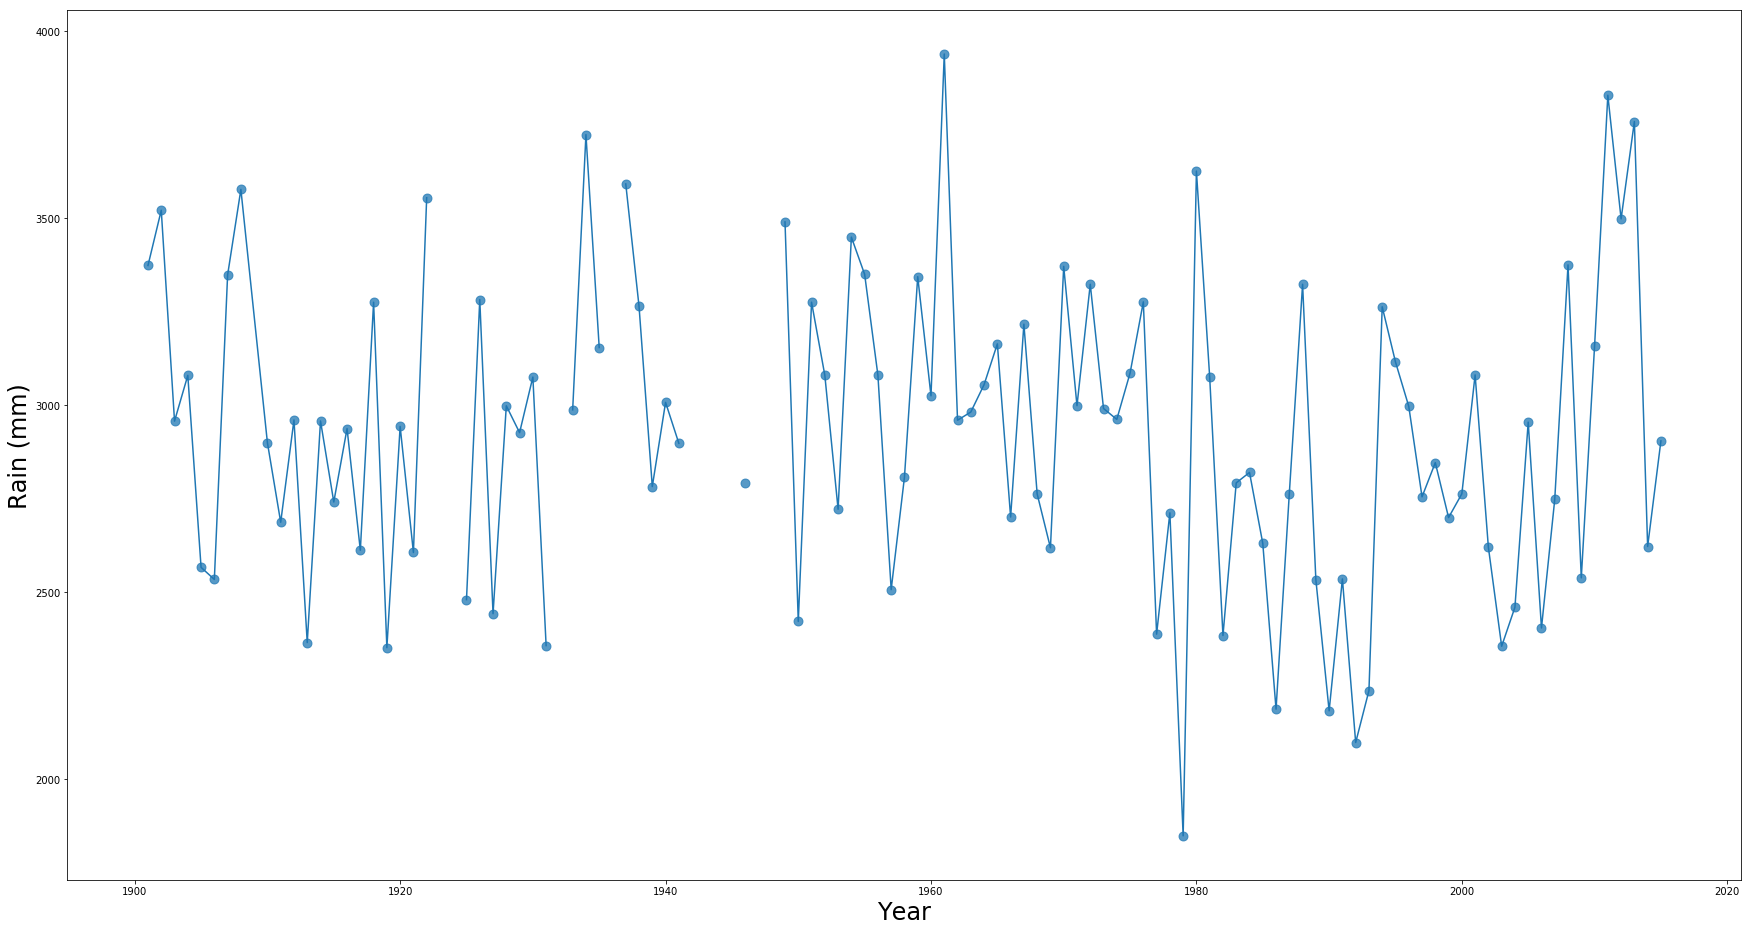

In [4]:
location = india["SUBDIVISION"]
year = india["YEAR"]
rain = india["ANNUAL"]

#filter for just one location:
anda = india[india['SUBDIVISION'] == "ANDAMAN & NICOBAR ISLANDS"]
year = anda["YEAR"]
rain = anda["ANNUAL"]

plt.figure(figsize=(30,16))

plt.plot(year, rain)
plt.scatter(year, rain, s=80, alpha=0.75)

plt.xlabel("Year", fontsize=24)
plt.ylabel("Rain (mm)", fontsize=24)

location_names = pd.Series(location, name='A').unique()
print(location_names)

#print(anda)

In [5]:
india['SUBDIVISION'] = india['SUBDIVISION'].str.replace('&','and')
india['SUBDIVISION'] = india['SUBDIVISION'].str.lower()
india['SUBDIVISION'].replace('assam and meghalaya','assam', inplace = True)

In [8]:
map_data = gpd.read_file('States/Indian_States.shp')
map_data.rename(columns = {'st_nm':'SUBDIVISION'}, inplace = True)
map_data.shape

(36, 2)

In [9]:
map_data.head(36)

,SUBDIVISION,geometry
0,Andaman & Nicobar Island,(POLYGON ((93.71975948121514 7.207067636262479...
1,Arunanchal Pradesh,"POLYGON ((96.16260946675357 29.38078474502004,..."
2,Assam,"(POLYGON ((89.74322932956994 26.3036203411059,..."
3,Bihar,(POLYGON ((84.50719832504274 24.26323103208654...
4,Chandigarh,"POLYGON ((76.84147287327454 30.75995934035132,..."
5,Chhattisgarh,"POLYGON ((83.33531747931829 24.09885072448139,..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20656615030765 20.12215606165296,..."
7,Daman & Diu,(POLYGON ((72.89334544683499 20.44538762783679...
8,Goa,(POLYGON ((74.11917887850251 14.75344075069012...
9,Gujarat,(POLYGON ((71.70375251096965 20.99958229049037...


In [10]:
map_data['SUBDIVISION'] = map_data['SUBDIVISION'].str.replace('&','and')
map_data['SUBDIVISION'].replace('Arunanchal Pradesh',
                              'Arunachal Pradesh', inplace = True)
map_data['SUBDIVISION'].replace('Telangana', 
                              'Telengana', inplace = True)
map_data['SUBDIVISION'].replace('NCT of Delhi', 
                              'Delhi', inplace = True)
map_data['SUBDIVISION'].replace('Andaman and Nicobar Island', 
                              'Andaman and Nicobar Islands', 
                               inplace = True)

In [11]:
map_data['SUBDIVISION'] = map_data['SUBDIVISION'].str.lower()

In [12]:
map_data.head()

,SUBDIVISION,geometry
0,andaman and nicobar islands,(POLYGON ((93.71975948121514 7.207067636262479...
1,arunachal pradesh,"POLYGON ((96.16260946675357 29.38078474502004,..."
2,assam,"(POLYGON ((89.74322932956994 26.3036203411059,..."
3,bihar,(POLYGON ((84.50719832504274 24.26323103208654...
4,chandigarh,"POLYGON ((76.84147287327454 30.75995934035132,..."


In [13]:
india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
SUBDIVISION    4116 non-null object
YEAR           4116 non-null int64
JAN            4112 non-null float64
FEB            4113 non-null float64
MAR            4110 non-null float64
APR            4112 non-null float64
MAY            4113 non-null float64
JUN            4111 non-null float64
JUL            4109 non-null float64
AUG            4112 non-null float64
SEP            4110 non-null float64
OCT            4109 non-null float64
NOV            4105 non-null float64
DEC            4106 non-null float64
ANNUAL         4090 non-null float64
Jan-Feb        4110 non-null float64
Mar-May        4107 non-null float64
Jun-Sep        4106 non-null float64
Oct-Dec        4103 non-null float64
dtypes: float64(17), int64(1), object(1)
memory usage: 611.0+ KB


In [14]:
#Replacing the missing values with mean of the column
india['JAN'].fillna((india['JAN'].mean()), inplace=True)
india['FEB'].fillna((india['FEB'].mean()), inplace=True)
india['MAR'].fillna((india['MAR'].mean()), inplace=True)
india['APR'].fillna((india['APR'].mean()), inplace=True)
india['MAY'].fillna((india['MAY'].mean()), inplace=True)
india['JUN'].fillna((india['JUN'].mean()), inplace=True)
india['JUL'].fillna((india['JUL'].mean()), inplace=True)
india['AUG'].fillna((india['AUG'].mean()), inplace=True)
india['SEP'].fillna((india['SEP'].mean()), inplace=True)
india['OCT'].fillna((india['OCT'].mean()), inplace=True)
india['NOV'].fillna((india['NOV'].mean()), inplace=True)
india['DEC'].fillna((india['DEC'].mean()), inplace=True)
india['ANNUAL'].fillna((india['ANNUAL'].mean()), inplace=True)
india['Jan-Feb'].fillna((india['Jan-Feb'].mean()), inplace=True)
india['Mar-May'].fillna((india['Mar-May'].mean()), inplace=True)
india['Jun-Sep'].fillna((india['Jun-Sep'].mean()), inplace=True)
india['Oct-Dec'].fillna((india['Oct-Dec'].mean()), inplace=True)

In [15]:
merged_data = pd.merge(map_data, india, how = 'left', on = 'SUBDIVISION')
merged_data.fillna(0, inplace = True)
merged_data.head()

,SUBDIVISION,geometry,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,andaman and nicobar islands,(POLYGON ((93.71975948121514 7.207067636262479...,1901.0,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,andaman and nicobar islands,(POLYGON ((93.71975948121514 7.207067636262479...,1902.0,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,andaman and nicobar islands,(POLYGON ((93.71975948121514 7.207067636262479...,1903.0,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,andaman and nicobar islands,(POLYGON ((93.71975948121514 7.207067636262479...,1904.0,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,andaman and nicobar islands,(POLYGON ((93.71975948121514 7.207067636262479...,1905.0,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [16]:
year_2015 = merged_data[merged_data["YEAR"]==2015]

In [17]:
print(year_2015['ANNUAL'].max())
print(year_2015['ANNUAL'].min())

3106.0
435.3
